### Modelado

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install skfeature-chappers

Note: you may need to restart the kernel to use updated packages.


In [8]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression  # Import SelectKBest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.inspection import permutation_importance
import multiprocessing  
from sklearn.tree import export_graphviz
import graphviz

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)

In [9]:
X_train = pd.read_csv('X_train.csv.gz')
X_test = pd.read_csv('X_test.csv.gz')
y_train = pd.read_csv('y_train.csv.gz')
y_test = pd.read_csv('y_test.csv.gz')

In [10]:
y_train = y_train.drop(columns=['price'])
y_test = y_test.drop(columns=['price'])

In [11]:
#selected_columns = ['accommodates','bedrooms', 'bathrooms_count' ,'number_of_reviews',
                              #'availability_30', 
                              #'antiguedad', 'host_is_superhost_encoded','room_type_encoded', 'amenity_count', 'neighbourhood_cleansed_encoded', 'month']

X_train_reg =  X_train.drop(['date', 'latitude', 'longitude', 'available', 'host_is_superhost', 'amenities', 'neighbourhood_cleansed', 'room_type'], axis=1)
X_test_reg = X_test.drop(['date', 'latitude', 'longitude', 'available', 'host_is_superhost', 'amenities', 'neighbourhood_cleansed', 'room_type'], axis=1)

In [8]:
f_scores, _ = f_regression(X_train_reg, y_train)
minfo_reg = mutual_info_regression(X_train_reg, y_train)

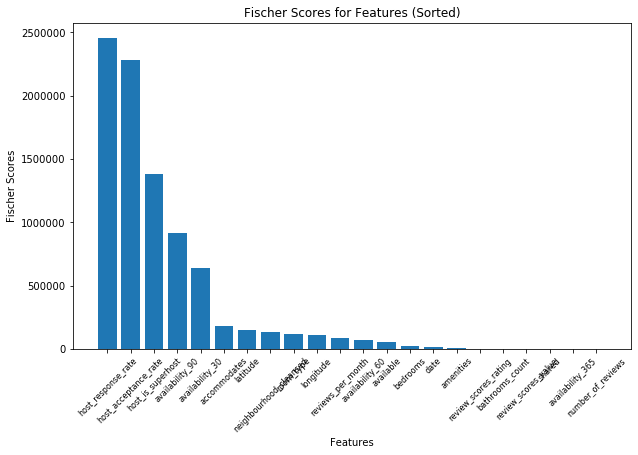

In [9]:
feature_names = X_train.columns  

sorted_indices = sorted(range(len(f_scores)), key=lambda k: f_scores[k], reverse=True)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_scores = [f_scores[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, align='center')
plt.xticks(range(len(sorted_scores)), sorted_features, rotation=45,fontsize=8)
plt.xlabel('Features')
plt.ylabel('Fischer Scores')
plt.title('Fischer Scores for Features (Sorted)')
plt.show()


In [10]:
for feature, score in zip(sorted_features, sorted_scores):
    print(f'{feature}: {score}')

host_response_rate: 2451082.523669038
host_acceptance_rate: 2278871.0082094735
host_is_superhost: 1382433.078856904
availability_90: 912141.6359233384
availability_30: 637752.0278734996
accommodates: 181766.3574715468
latitude: 146316.4404871971
neighbourhood_cleansed: 132084.22248608415
room_type: 115040.06533198517
longitude: 113658.38669161014
reviews_per_month: 90160.52971054481
availability_60: 70764.2616642256
available: 56106.560430524696
bedrooms: 25829.26656101249
date: 17905.23015179766
amenities: 11581.051662502401
review_scores_rating: 4055.547293509782
bathrooms_count: 3360.042072655646
review_scores_value: 764.9032327832188
shared: 701.1550411958754
availability_365: 622.9120480430107
number_of_reviews: 179.25130392883045


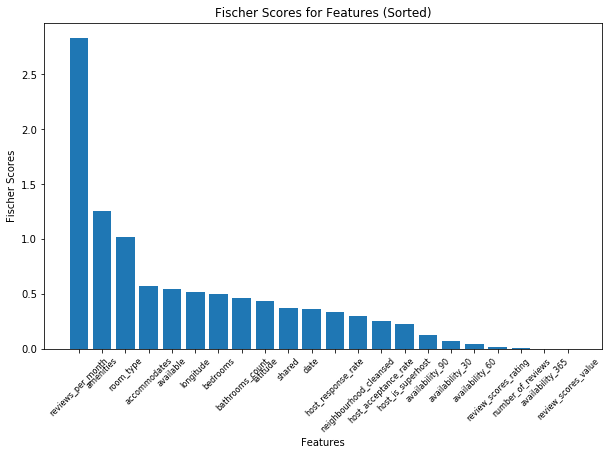

In [11]:
feature_names = X_train.columns  

sorted_indices = sorted(range(len(minfo_reg)), key=lambda k: minfo_reg[k], reverse=True)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_scores = [minfo_reg[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, align='center')
plt.xticks(range(len(sorted_scores)), sorted_features, rotation=45,fontsize=8)
plt.xlabel('Features')
plt.ylabel('Fischer Scores')
plt.title('Fischer Scores for Features (Sorted)')
plt.show()


In [12]:
for feature, score in zip(sorted_features, sorted_scores):
    print(f'{feature}: {score}')

reviews_per_month: 2.8264434764862267
amenities: 1.256980044402595
room_type: 1.0215154571499774
accommodates: 0.5714283826178503
available: 0.5422580918354285
longitude: 0.5224380889752052
bedrooms: 0.49827017120314476
bathrooms_count: 0.4617518854668381
latitude: 0.4365611923825412
shared: 0.37249176135437256
date: 0.36337794056740247
host_response_rate: 0.33700755007189187
neighbourhood_cleansed: 0.30422834768964435
host_acceptance_rate: 0.2507108380977776
host_is_superhost: 0.22545670552036157
availability_90: 0.12526652499390512
availability_30: 0.07332150658634351
availability_60: 0.04157862771153109
review_scores_rating: 0.02265070823435078
number_of_reviews: 0.006992294942646637
availability_365: 0.004672855102069384
review_scores_value: 0.0013575510575769556


#### Regresion Lineal

In [13]:
modelreg = LinearRegression()

modelreg.fit(X_train_reg, y_train)

LinearRegression()

Text(0.5, 1.0, 'Fischer Scores Variables')

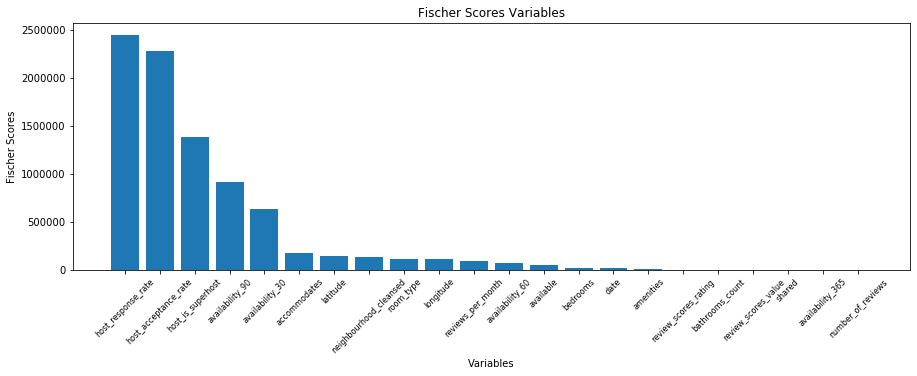

In [14]:
k_values = np.arange(2, 21)

feature_scores = []

for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X_train_reg, y_train)

    scores = cross_val_score(modelreg, X_new, y_train, cv=5)

    feature_scores.append(selector.scores_)

feature_scores = np.array(feature_scores)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
feature_names = X_train.columns
f_scores = selector.scores_
sorted_indices = sorted(range(len(f_scores)), key=lambda k: f_scores[k], reverse=True)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_scores = [f_scores[i] for i in sorted_indices]

plt.bar(range(len(sorted_scores)), sorted_scores, align='center')
plt.xticks(range(len(sorted_scores)), sorted_features, rotation=45, fontsize=8)
plt.xlabel('Variables')
plt.ylabel('Fischer Scores')
plt.title('Fischer Scores Variables')


k=2, Selected Features: Index(['accommodates', 'bathrooms_count'], dtype='object'), Average Score: 0.2899942799586777
k=3, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms'], dtype='object'), Average Score: 0.290487298743484
k=4, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'room_type_encoded'], dtype='object'), Average Score: 0.3336040347404874
k=5, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'shared',
       'room_type_encoded'],
      dtype='object'), Average Score: 0.33959543294557015
k=6, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'number_of_reviews',
       'shared', 'room_type_encoded'],
      dtype='object'), Average Score: 0.357814814278495
k=7, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'availability_60',
       'number_of_reviews', 'shared', 'room_type_encoded'],
      dtype='object'), Average Score: 0.3711650658882831
k=8, Selected Featu

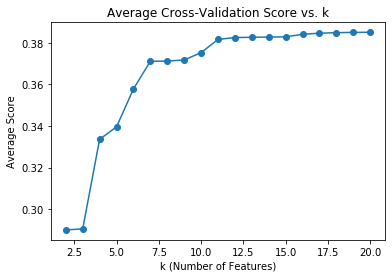

In [18]:
k_values = np.arange(2, 21)
average_scores_reg = []  

for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X_train_reg, y_train)

    scores_reg = cross_val_score(modelreg, X_new, y_train, cv=5)
    average_score_reg = scores_reg.mean() 

    selected_features_mask = selector.get_support()
    selected_features_reg = X_train_reg.columns[selected_features_mask]

    print(f'k={k}, Selected Features: {selected_features_reg}, Average Score: {average_score_reg}')

    average_scores_reg.append(average_score_reg)

plt.plot(k_values, average_scores_reg, marker='o')
plt.title('Average Cross-Validation Score vs. k')
plt.xlabel('k (Number of Features)')
plt.ylabel('Average Score')
plt.show()

In [19]:
modelreg.fit(X_train_reg, y_train)

y_train_pred_reg = modelreg.predict(X_train_reg)

y_test_pred_reg = modelreg.predict(X_test_reg)

mse_train_reg = mean_squared_error(y_train, y_train_pred_reg)
rmse_train_reg = np.sqrt(mse_train_reg)
r2_train_reg = r2_score(y_train, y_train_pred_reg)

mse_test_reg = mean_squared_error(y_test, y_test_pred_reg)
rmse_test_reg = np.sqrt(mse_test_reg)
r2_test_reg = r2_score(y_test, y_test_pred_reg)

mae_train_reg = mean_absolute_error(y_train, y_train_pred_reg)

mae_test_reg = mean_absolute_error(y_test, y_test_pred_reg)

percentage_error_train_reg = np.mean(np.exp(y_train_pred_reg - y_train)) - 1

percentage_error_test_reg = np.mean(np.exp(y_test_pred_reg - y_test)) - 1

In [20]:
print("Metrics for the Training Set:")
print(f"  Mean Squared Error (MSE): {mse_train_reg}")
print(f"  Root Mean Squared Error (RMSE): {rmse_train_reg}")
print(f"  R-squared (R2): {r2_train_reg}")
print(f"  Mean Absolute Error (MAE): {mae_train_reg}")
print(f"  Percentage Error: {percentage_error_train_reg}\n")

print("Metrics for the Testing Set:")
print(f"  Mean Squared Error (MSE): {mse_test_reg}")
print(f"  Root Mean Squared Error (RMSE): {rmse_test_reg}")
print(f"  R-squared (R2): {r2_test_reg}")
print(f"  Mean Absolute Error (MAE): {mae_test_reg}")
print(f"  Percentage Error: {percentage_error_test_reg}")


Metrics for the Training Set:
  Mean Squared Error (MSE): 0.5452897693188324
  Root Mean Squared Error (RMSE): 0.7384373834786755
  R-squared (R2): 0.385555818912217
  Mean Absolute Error (MAE): 0.5432263934562005
  Percentage Error: log_price    0.33241
dtype: float64

Metrics for the Testing Set:
  Mean Squared Error (MSE): 0.5432649898506321
  Root Mean Squared Error (RMSE): 0.737065119138487
  R-squared (R2): 0.3860965492916004
  Mean Absolute Error (MAE): 0.5424926311623397
  Percentage Error: log_price    0.334784
dtype: float64


#### Decision Tree

In [12]:
model_dt = DecisionTreeRegressor(random_state=42)

Text(0.5, 1.0, 'Fischer Scores for Features (Sorted)')

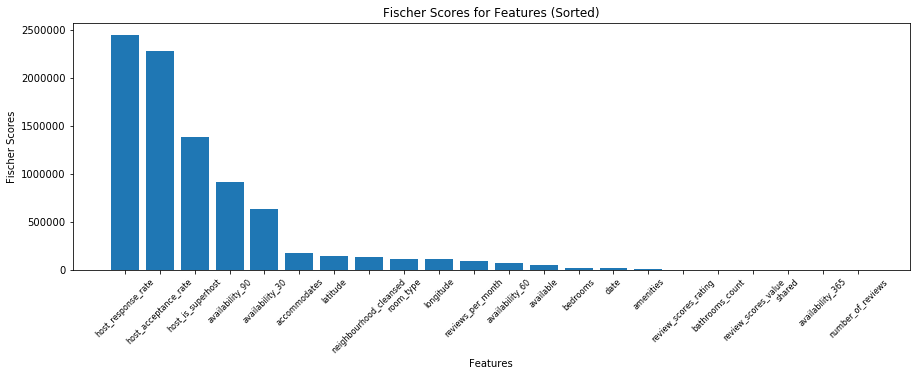

In [27]:
k_values = np.arange(2, 21)

feature_scores = []

for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X_train_reg, y_train)

    scores = cross_val_score(model_dt, X_new, y_train, cv=5)
    
    feature_scores.append(selector.scores_)

feature_scores = np.array(feature_scores)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
feature_names = X_train.columns
f_scores = selector.scores_
sorted_indices = sorted(range(len(f_scores)), key=lambda k: f_scores[k], reverse=True)
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_scores = [f_scores[i] for i in sorted_indices]

plt.bar(range(len(sorted_scores)), sorted_scores, align='center')
plt.xticks(range(len(sorted_scores)), sorted_features, rotation=45, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Fischer Scores')
plt.title('Fischer Scores for Features (Sorted)')

k=2, Selected Features: Index(['accommodates', 'bathrooms_count'], dtype='object'), Average Score: 0.34889163244690724
k=3, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms'], dtype='object'), Average Score: 0.38424081823217915
k=4, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'room_type_encoded'], dtype='object'), Average Score: 0.4076410305633445
k=5, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'shared',
       'room_type_encoded'],
      dtype='object'), Average Score: 0.41224648287481236
k=6, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'number_of_reviews',
       'shared', 'room_type_encoded'],
      dtype='object'), Average Score: 0.5484272472811746
k=7, Selected Features: Index(['accommodates', 'bathrooms_count', 'bedrooms', 'availability_60',
       'number_of_reviews', 'shared', 'room_type_encoded'],
      dtype='object'), Average Score: 0.7118407808877241
k=8, Selected F

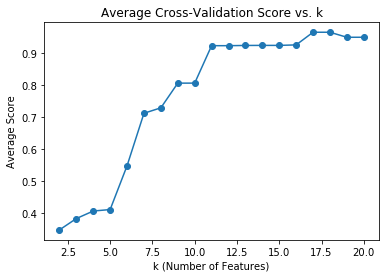

In [28]:
k_values = np.arange(2, 21)
average_scores_dt = [] 

for k in k_values:
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X_train_reg, y_train)

    scores_dt = cross_val_score(model_dt, X_new, y_train, cv=5)
    average_score_dt = scores_dt.mean() 

    selected_features_mask = selector.get_support()
    selected_features_dt = X_train_reg.columns[selected_features_mask]

    print(f'k={k}, Selected Features: {selected_features_dt}, Average Score: {average_score_dt}')

    average_scores_dt.append(average_score_dt)

plt.plot(k_values, average_scores_dt, marker='o')
plt.title('Average Cross-Validation Score vs. k')
plt.xlabel('k (Number of Features)')
plt.ylabel('Average Score')
plt.show()

In [13]:
decision_tree = ['host_response_rate', 'host_acceptance_rate', 'accommodates',
       'bathrooms_count', 'bedrooms', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month',
       'shared', 'host_is_superhost_encoded', 'room_type_encoded', 'month',
       'antiguedad']

X_train_dt = X_train[decision_tree]
X_test_dt = X_test[decision_tree]

In [14]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=k_folds)

grid_search.fit(X_train_dt, y_train)

best_params = grid_search.best_params_

best_model_dt = grid_search.best_estimator_

y_train_pred_best_dt = best_model_dt.predict(X_train_dt)

mse_train_best_dt = mean_squared_error(y_train, y_train_pred_best_dt)
rmse_train_best_dt = np.sqrt(mse_train_best_dt)
r2_train_best_dt = r2_score(y_train, y_train_pred_best_dt)
mae_train_best_dt = mean_absolute_error(y_train, y_train_pred_best_dt)

y_test_pred_best_dt = best_model_dt.predict(X_test_dt)

mse_test_best_dt = mean_squared_error(y_test, y_test_pred_best_dt)
rmse_test_best_dt = np.sqrt(mse_test_best_dt)
r2_test_best_dt = r2_score(y_test, y_test_pred_best_dt)
mae_test_best_dt = mean_absolute_error(y_test, y_test_pred_best_dt)

In [15]:
print("Best Model:")
print(best_model_dt)

print("\nBest Hyperparameters:")
print(best_params)

print("\nMetrics for Training Set:")
print("Mean Squared Error (MSE):", mse_train_best_dt)
print("Root Mean Squared Error (RMSE):", rmse_train_best_dt)
print("R-squared (R2):", r2_train_best_dt)
print("Mean Absolute Error (MAE):", mae_train_best_dt)

print("\nMetrics for Test Set:")
print("Mean Squared Error (MSE):", mse_test_best_dt)
print("Root Mean Squared Error (RMSE):", rmse_test_best_dt)
print("R-squared (R2):", r2_test_best_dt)
print("Mean Absolute Error (MAE):", mae_test_best_dt)


Best Model:
DecisionTreeRegressor(random_state=42)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Metrics for Training Set:
Mean Squared Error (MSE): 0.029099970645036395
Root Mean Squared Error (RMSE): 0.17058713505137602
R-squared (R2): 0.9672095303475
Mean Absolute Error (MAE): 0.05924682955692456

Metrics for Test Set:
Mean Squared Error (MSE): 0.031623533481537874
Root Mean Squared Error (RMSE): 0.17783006911525923
R-squared (R2): 0.9642645915150055
Mean Absolute Error (MAE): 0.06180452333727738


In [25]:
importancia = permutation_importance(
                estimator    = best_model_dt,
                X            = X_train_dt,
                y            = y_train,
                n_repeats    = 10,
                scoring      = 'neg_root_mean_squared_error'
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_dt.columns
df_importancia.sort_values('importances_mean', ascending=False)


,importances_mean,importances_std,feature
9,0.630368,0.000411,number_of_reviews
3,0.588989,0.000268,bathrooms_count
2,0.546881,0.000320,accommodates
12,0.536286,0.000219,reviews_per_month
17,0.521087,0.000321,antiguedad
1,0.494977,0.000339,host_acceptance_rate
8,0.472058,0.000308,availability_365
15,0.462712,0.000334,room_type_encoded
4,0.456680,0.000271,bedrooms
6,0.436263,0.000275,availability_60


In [22]:
print(f"Profundidad del árbol: {best_model_dt.get_depth()}")
print(f"Número de nodos terminales: {best_model_dt.get_n_leaves()}")

Profundidad del árbol: 49
Número de nodos terminales: 203981
